# Hybrid Cryptography Group 4

#### Authors:

Tom Chappell-Pike, Ben McCarthy, Abigail McComiskey, Enchi Ni, Eleanor Roome

# Table of content

1. [Introduction](#introduction)


2. [Initialisations](#initialisations)

    2.1. [File Finding](#findingfile)


3. [The Caesar Cypher](#cc)

    3.1. [Encryption Process](#ep1)
    
    3.2. [Decryption Process](#dp1)
    
    
4. [The Vigenere Cypher](#vc)

    4.1. [Encryption Process](#ep2)
    
    4.2. [Decryption Process](#dp2)
    
    
5. [Frequency Analysis](#fa)

    5.1. [Getting a large text sample](#lts)
    
    5.2. [Finding Frequency](#ff)
    
    5.3. [Finding Letter Frequency of Large Text](#flt)
  
    5.4. [Breaking The Caesar Cypher](#bcc)
    

6. [RSA](#rsa)
    
    6.1. [Turning vigenere key into a Tuple](#vkt)
    
    6.2. [Generating the RSA key](#rsak)
    
    6.3. [RSA Encryption](#re)
    
    6.4. [RSA Decryption](#rd)
    
    
7. [A Hybrid system](#ahs)

    7.1. [Disguising the frequency for each letter](#df)
    
    7.2. [Creating the public key](#cpk)
    
    7.3. [Message encryption](#me)
    
    7.4. [Public key decryption](#pkd)
    
    7.3. [Message decryption](#md)
    
    
8. [Break The Vigenere Cypher](#bvc)
    
    8.1. [Kasiski function](#kf)
    
    8.2. [Extract possible key lengths](#epkl)
    
    8.3. [Decrypt the ciphertext with the given key length](#dc)
    
    8.4. [Decrypt the ciphertext](#dtc)

In [1]:
import random, requests, os, matplotlib.pyplot as plt, cryptography_functions, time, string

# Introduction<a name="introduction"></a>

The Caesar cipher and Vigenère cipher are both methods used to encrypt messages. We have implemented a multi-level encryption and decryption system and applied it to messages. Here is an introduction to our steps:

The first part is the Caesar cipher. We encrypt the letters using random shift values and decrypt the Caesar-encrypted file based on the stored shift values. Then, we use letter frequency analysis to attempt to decrypt the encrypted message based on the frequency of occurrence of the letters in the alphabet.

The next part is the Vigenère cipher. We generate a random-length key to encrypt the message and use the stored key file to decrypt the message, recovering the original text.

We then improve the system by creating a random 2-grams encoding dictionary. Messages are encoded using 2-grams by replacing each letter with a corresponding random two-letter combination, which are stored in a dictionary. The message is encrypted by its letters' 2-grams, and then using the Vigenère cipher. The 2-grams dictionary and the Vigenère key are concatenated into a string, chunked, converted to binary, and encrypted with RSA- this is the public key.

We then decrypt the public key using the RSA private key to recover the 2-grams dictionary and the Vigenère key. Using Vigenère decryption and reverse 2-grams dictionary decryption, we recover the original message. Additionally, we attempt to crack both the Caesar cipher and the Vigenère cipher.

Furthermore, we generate public and private keys using 1024-bit large prime numbers. We encrypt the Vigenère key and 2-grams encoding to ensure secure key transmission. We also hide the alphabetic frequency to make RSA encryption more secure.

# Initialisations<a name="initialisations"></a>

Firstly, we must import the required libraries in order to get our code to function properly. 


## File Finding<a name="findingfile"></a>

Next, we define a function called find_file, which searches the directory for a file name that the user inputs, to be encrypted or decrypted. It checks to see whether the file is in the directory or not, and if it is not it prompts the user to try again, and input another name.

In [2]:
#### FINDING FILE IN DIRECTORY ####

def find_file():
    in_directory = False

    while in_directory == False:
        file_name = input("Input the name of the text file you would like to encrypt / decrypt, including the .txt: ")
        if os.path.isfile(file_name): #checks if the inputted file is in the directory
            in_directory = True
        else:
            print("")
            print("The file you inputted is not in the directory, try again")
          
    return file_name

# The Caesar Cypher<a name="cc"></a>

## Caesar Cypher Encryption<a name="ep1"></a>

We then define a function called caesar_encrypt, which encrypts a message via the Caesar Cypher. This encryption runs through the message letter by letter, shifting each letter a fixed number of places down the alphabet. Naturally, there are 26 ways this can happen, as there are 26 possible shifts due to the length of the English alphabet. This includes a trivial shift, in which the message is shifted 26 places, and is the same as the unencrypted message. 

To do this, the function find_file is run, to allow the user to search for their text file in the directory that they would like to encrypt. This file is then opened, and read to the string variable called message. 

The file encrypted_text is then opened, to be written to. This is where our final Caesar shifted message will be stored on completion of the function. 

The file caesar_shift_value is opened next, also to be written to. This is so the user can know and keep the shift value used to encrypt the message, so that it can later be decrypted. A random number between 1 and 26 inclusive is then generated as the shift value. 

We then define a list called encrypted_message, to which each letter, after it is shifted, will be appended to.

The final message will only contain alphabetic characters, with capitalisation preserved.



## Encryption Process:

To encrypt the message, we iterate through each character in the message via a for loop. This character is then checked to see whether it is in the alphabet, otherwise it will not be encrypted and will not be in the final encrypted message. 

For each alphabetic character in this for loop, it is then checked to see whether it is uppercase or lowercase, and an offset value is set, based on its ASCII value. This will be 65 for uppercase letters, and 97 for lowercase letters. This offset allows us to set the letters A-Z to be indexed as numbers 0 to 25. 

The ASCII value of the character is then offset, to set it to be within that range of 0 to 25, for ease of calculation, and stored to the variable character_offset.

The encryption then happens via this formula:

$$(\text{character_offset}+\text{shift_value}) mod 26 + \text{offset}$$

This shifts the character, by the shift value, takes the modulo 26 of that calculation, such that if the character is greater than 26 (Z), it returns the remainder to add to 0 (A). The offset value is then added back to the now encrypted character, and it is transformed from its ASCII value again to the character that it represents.

This shifted character is then appended to the encrypted_message list, and this occurs for all alphabetic characters in the message.

Then, a variable final_message is created, which joins all the elements of the encrypted_message list into a single string. This string is then written to the encrypted_text file, such that the user now has a text file with their encrypted message. The shift value is also then written to the shift_value file

The files are then all closed, and a message telling the user where their encrypted message and shift value has been written to is displayed.

In [3]:
#### CASESAR CYPHER ##### (maintains case of characters)

def caesar_encrypt(): #defines the caesar encryption function
    
    file_name = find_file()

    input_text = open(file_name,"r") #opens the text file we want to read
    message = input_text.read() #reads the text file to the variable message
    
    encrypted_text = open("encrypted_text.txt","w") #opens the encrypted text file to which we write the encryption
    
    shift_value_file = open("_caesar_shift_value.txt","w")
    shift_value = random.randint(1,26) #generates a shift value between 1 and 26 inclusive
    
    encrypted_message = []
    
    for character in message: #iterates character through each element of the message
        if character.isalpha(): #checks to see if the character is in the alphabet
            
            if character.isupper(): #checks to see if character is uppercase
                offset = 65 #sets appropriate offset value
            else:
                offset = 97
            
            character_offset = ord(character)-offset #offsets character to be between 0 and 25

            encrypted_message.append(chr((character_offset+shift_value)%26+offset))
            #appends our changed letter to the encrypted message list
    

    final_text = "".join(encrypted_message) #turns the list into a string
    encrypted_text.write(final_text) #writes the string to the text file
    shift_value_file.write(str(shift_value))
    shift_value_file.close()
    encrypted_text.close()
    print("")
    print("Encrypted message written to encrypted_text.txt")
    print("Shift value written to caesar_shift_value.txt")
    input_text.close() #closes the files
    
    return 


## Caesar Cypher Decryption<a name="dp1"></a>

The decryption process of the Caesar Cypher is the inverse function of the encryption process. We do this with a function defined as caesar_decrypt

We initially ask the user which file they would like decrypted, using the find_file function again. This file is then opened and read to the variable cryptic.

The caesar_shift_value file is then found, opened, and read to the variable shift_value

The file decrypted_text is then opened, to be written to. This is where our final decrypted message will be stored on completion of the function.

The list decrypted_message is then defined, and it is to this which we will append each decrypted character.

Again, the final message will only contain alphabetic characters, with capitalisation preserved.



## Decryption Process:

To decrypt the message, we iterate through each character in the cryptic string. It is checked if it is alphabetic, otherwise it will not be decrypted and will not be in the final message.

For each alphabetic character in the cryptic string, it is then checked to see whether it is uppercase or lowercase, and an offset value is set, based on its ASCII value. This will be 65 for uppercase letters, and 97 for lowercase letters. This offset allows us to set the letters A-Z to be indexed as numbers 0 to 25. 

The ASCII value of the character is then offset, to set it to be within that range of 0 to 25, for ease of calculation, and stored to the variable character_offset.

The decryption then happens via this formula:

$$(\text{character_offset} - \text{shift_value}) mod26 + \text{offset}$$

This takes our offset encrypted character, shifts the character by the negative the shift value (the inverse of the encrpytion process), takes the modulo 26 of that to ensure it stays within our range of 0 (A) to 25 (Z), then adds the offset. It is then transformed from that ASCII value to the character that represents. 

This decrypted character is then appended to the decrypted_message list, and this occurs for all alphabetic characters in the message.

Then, a variable final_text is created, which joins all the elements of the decrypted_message list into a single string. This string is then written to the decrypted_text file, such that the user now has a text file with their decrypted message. 

The files are then all closed, and the user is shown a message showing to which file their decrypted message has been written to. 


In [4]:
def caesar_decrypt(): #needs a shift value to decrypt 
    
    file_name = find_file() #lets the user input the file name they would like to read
    
    shift_value_file = open("_caesar_shift_value.txt","r") #opens the shift value file
    shift_value = int(shift_value_file.read()) #read the integer value stored there
    
    encrypted_text = open(file_name,"r") #opens the encrypted text file to read
    cryptic = encrypted_text.read() #sets cryptic to the string value of all the text in encrypted_text.txt
    
    decrypted_text = open("decrypted_text.txt","w") #opens the decrypted text file to write to    

    decrypted_message = []
       
    for character in cryptic: #iterates each character in the cryptic text
        if character.isalpha(): #checks if character is in alphabet
            
            if character.isupper(): #checks if character is uppercase
                offset = 65 #sets appropriate offset
            else:
                offset = 97
            
            character_offset = ord(character)-offset #offsets character to be between 0 and 25
            
            decrypted_message.append(chr((character_offset-shift_value)%26+offset))
            #appends decrypted character to decrypted message list
    
    
        
    final_text = "".join(decrypted_message) #changes the list into a string
    decrypted_text.write(final_text) #writes the string to the text file
    
    decrypted_text.close()  
    encrypted_text.close()#closes the files
    print("")
    print("Decrypted message written to decrypted_text.txt")
    
    return 

# The Vigenere Cypher<a name="vc"></a>

## Vigenere Cypher Encryption<a name="ep2"></a>

We define a function vigenere_encrypt, as our function which encrypts a message via the Vigenere Cypher. The Vigenere Cypher encrypts a message using a keyword and a Caesar Cypher stlye encryption. We start with the first character of the message, and the first character of the keyword. The first character of the keyword is found, and set to be the first letter of the alphabet, and all characters follow in order. i.e, if the first letter were to be "R", the shifted alphabet would be R,S,T,U...Z,A,B,...Q. We then find the position in the  standard alphabet of the first character of the message, and take this positional index and encrypt the character by selecting the letter of the same index in the shifted alphabet. This is repeated for all characters in the message, cycling through each character of the keyword. If the keyword is shorter than the message, then when the final character of the keyword is reached, it loops back to the fist character of the keyword. 

To do this, we first prompt the user to input the name of the text file that they would like to encrypt. This is opened, and read as a list to message_list_unfiltered. This is then filtered, such that only alphabetic characters are in the list, and this list is called message_list

The encrypted_text and key_file files are then opened, both to be written to.

The encrypted_message list is then defined, to which we will append all our encrypted characters. 

Again, this encrypted message will contain only alphabetic characters, with capitalisation preserved. 



## Encryption Process

A random length for our Vigenere keyword is generated, and stored to variable key_length. This is then used to generate key_list, which generates a list of length key_length, containing that amount of random numbers which range from 0 to 25. This is our vigenere keyword. 0 to 25 is used, as it is represents each letter of the alphabet, with 0 representing A and 25 representing Z

Then, we iterate i from 0 to the length of the message_list.

Within this for loop, we find which position of the keyword we are currently at, by taking our iterator (i) modulo the length of our keyword. This is stored to key_pos

$$ \text{key_pos} = i mod \text{len(key_list)}$$

Then, we set the variable character to be the current character of the message which we are encrypting

To preserve capitalisation, this character is checked to see whether it is uppercase or lowercase, and an appropriate offset is set. 65 for uppercase characters, and 97 for lowercase characters. 

Then, the character is offset, to come in line with the 0-25 range to represent each character of the alphabet.

To encrypt the character, the following formula is used:

$$(\text{character_offset}+\text{key_list[key_pos]})mod26 + \text{offset}$$

This adds the shift value, corresponding to the shifted alphabet via the keyword character, takes this modulo 26 to ensure it stays within the alphabetic range of 0 to 25, then adds the offset back to return the corresponding ASCII value

This encrypted ASCII value is then transformed into its character, and appended to the encrypted_message list.

The variable final_text is defined, joining all the encrypted characters into a single string. It is then written to the encrypted_text file.

The keyword is then letter by letter, shifted to 65 such that it can be a capital ASCII value, and then it is transformed into its corresponding character. Each character is then joined together into a long string, and written to the vigenere_key text file. 

The files are then closed, and the user is given a message saying where their encrypted message and vigenere key have been written to. 


In [5]:
#### VIGENERE CYPHER ####
def vigenere_encrypt():
    
    file_name = find_file()
    
    input_text = open(file_name,"r") #opens the text file we want to read
    message_list_unfiltered = list(input_text.read()) #reads the text file to the variable message
    message_list = [x for x in message_list_unfiltered if x.isalpha()] #makes a list of only alphabetical characters
    encrypted_text = open("encrypted_text.txt","w") #opens the encrypted text file to which we write the encryption
    key_file = open("_vigenere_key.txt","w")
   
    
    encrypted_message = []
    key_length = random.randint(129,384) #generates a random length for our keyword
    
    key_list = [random.randint(0,25) for x in range(0,key_length)] #generates a list for our keyword in ASCII
    
    for i in range(0,len(message_list)):

        key_pos =  i%len(key_list) #generates position of where we are in the key
        

        character = message_list[i] #sets character to message character for ease
        if character.isupper(): #checks if y is uppercase in the alphabet
            offset = 65 #sets ASCII offsets
        else: offset = 97

        character_offset = ord(character) - offset #offsets character to be within 0 and 25

        character_encrypted = (character_offset+key_list[key_pos])%26 + offset #encrypts the character 

        encrypted_message.append(chr(character_encrypted)) #appends encrypted character to encrypted message
       
    final_text = "".join(encrypted_message)
    encrypted_text.write(final_text) #writes the final encrypted message to the file
    
    key = "".join(chr(m+65) for m in key_list) #turns keylist into a string
    key_file.write(key) #writes the key to the file
    
    
    encrypted_text.close()
    input_text.close() #closes the files
    key_file.close()
    
    print("Encrypted text written to encrypted_text.txt, and vigenere key written to _vigenere_key.txt")
    
    return      

## Vigenere Cypher Decryption<a name="dp2"></a>

The decryption process of the Vigenere Cypher is the inverse function of the encryption process. We do this with a function defined as vigenere_decrypt

We initially ask the user which file they would like decrypted, using the find_file function again. This file is then opened and read to the variable cryptic.

The vigenere_key file is then found, opened, and read to the variable key_list, where it is shifted down by 65 to be within the 0 to 25 range for our alphabet

The file decrypted_text is then opened, to be written to. This is where our final decrypted message will be stored on completion of the function.

The list decrypted_message is then defined, and it is to this which we will append each decrypted character.

Again, the final message will only contain alphabetic characters, with capitalisation preserved.

## Decryption Process:

We first iterate from i to the length of the encrypted message, stored as cryptic. 

The current characer is set using the iterator and stored as character.

Within this for loop, we find which position of the keyword we are currently at, by taking our iterator (i) modulo the length of our keyword. This is stored to key_pos

$$ \text{key_pos} = i mod \text{len(key_list)}$$

We then check if the character is uppercase or lowercase, and set an appropriate offset value. 65 for uppercase characters, and 97 for lowercase characters. 

The character is then offset using this. 

Then the character is decrypted via this formula:

$$(\text{character_offset}-\text{key_list[key_pos]})mod26 + \text{offset}$$

This subtracts the shift value obtained via the shifted alphabet corresponding to the current letter in our keyword, then does modulo 26 to ensure we stay within our alphabet range of 0-25, and adds the offset. 

Then the decrypted ASCII value is turned into the corresponding alphabetic character, and appended to the decrypted_message list.

The variable final_text is then defined, joining each element of the decrypted_message to a single long string.

final_text is then written to the decrypted_message file.

The files are then closed, and a message is sent to the user telling them where their decrypted message has been stored. 


In [6]:
def vigenere_decrypt():
    
    file_name = find_file()
    
    key_file = open("_vigenere_key.txt","r") #opens file with key in it to read
    key = key_file.read() #reads the file to key
    key_list = [ord(m) - 65 for m in key] #offsets all values of key to be between 0 and 25
    
    encrypted_text = open(file_name,"r") #opens encrypted text file to read
    cryptic = encrypted_text.read() #reads the file to cryptic
    
    decrypted_text = open("decrypted_text.txt","w") #opens the decrypted text file to write to
    decrypted_message = [] #creates decrypted message list
  
    for i in range(0,len(cryptic)): #iterates through the encrypted message
        character = cryptic[i] #sets character to the current character
        key_pos = i%len(key_list) #sets our position within the key 
        
        if character.isupper(): #checks to see if the character is uppercase
            offset = 65 #sets appropriate offset value
        else:
            offset = 97
            
        character_offset = ord(character)-offset #offsets character to be between 0 and 25
        
        character_decrypted = (character_offset-key_list[key_pos])%26 + offset
        #decrypts the character using the keyword
        
        decrypted_message.append(chr(character_decrypted)) #appends character to decrypted message
        
    final_text = "".join(decrypted_message) #turns decrypted message into a string
    decrypted_text.write(final_text) #writes this string to the decrypted text file
    
    decrypted_text.close() #closes the files
    encrypted_text.close()
    key_file.close()
    print("Decrypted message written to decrypted_text.txt")
    return
    

# Frequency Analysis<a name="fa"></a>

## Getting a large text sample<a name="lts"></a>

In order to perform frequency analysis, to break the Caesar Cypher, we first need to analyse a large piece of written english text, in order to count the appearances of each letter.

Using the function url_to_text_utf8, we can extract text from the internet, and store it as a string. Below, we take the text from famous English novels, in order to analyse the characters.

The books we have extracted from are: Alice's Adventures in Wonderland, The Great Gatsby, Dracula, Moby Dick and Frankenstein; Or, The Modern Prometheus. This amounts to 2238590 characters 

The function then returns a long string, composed of all of the texts combined. 

In [7]:
#### URL TEXT EXTRACTING ####
def url_to_text_utf8(url):  #### Sourced code from the GitHub repo provided for this project
    '''
    Given a url for a text that is 
    'utf-8' encoded this function 
    returns that text.
    '''
    response = requests.get(url) #gets the URL of the text file
    response.encoding = 'utf-8-sig' #encodes the text file
    return response.text #returns the text file
           
def get_large_text():        
    wonderland = url_to_text_utf8("https://gutenberg.org/cache/epub/11/pg11.txt")[1490:148820]
    gatsby = url_to_text_utf8("https://gutenberg.org/cache/epub/64317/pg64317.txt")[1497:278020]
    dracula = url_to_text_utf8("https://gutenberg.org/cache/epub/345/pg345.txt")[3130:860610]
    moby = url_to_text_utf8("https://gutenberg.org/cache/epub/2701/pg2701.txt")[6000:1241690]
    frankenstein = url_to_text_utf8("https://gutenberg.org/cache/epub/84/pg84.txt")[1440:427680]
    #creates large strings of texts from english books for analysis later

    text = wonderland + gatsby + dracula + moby + frankenstein
    return text

    #text gives us over 2 million characters to analyse (not all may be alphabet though most all are)


## Finding Frequency<a name="ff"></a> 

The frequency_finder function takes an input text, and returns an ordered list of the most frequent characters in descending order.

It starts by initialising a dictionary, counts, of the uppercase alphabet ASCII values as keys, and setting the values of each key to zero.

The text is then all made uppercase, such that it can be searched for in the dictionary.

Then, iterating through all the characters in the text, it checks if the character is in the counts dictionary, i.e the character is an alphabet character, then using that character as the key, it increases the value by one. 

After all the characters are iterated through, the dictionary then contains all the letters in the alphabet, and their corresponding frequencies.

Next, the dictionary is sorted by the values of the key, such that the most frequent letter becomes the first entry in the dictionary, and all other letters follow in descending value order. 

A list called frequency is then created, being the list of the ordered keys from the counts dictionary.

The function then returns the list of the most frequent characters in descending order. 

In [8]:
def frequency_finder(text):
    
    counts = {chr(x):0 for x in range(65,91)} #creates a dictionary of all the letters in the alphabet with value 0
    text = text.upper() #makes all text uppercase
    for character in text: #iterates through all the elements of the string "text"
        if character in counts: #checks if the element is an alphabet letter
            counts[character]+=1 #ups the count by one for each letter
    sorted_counts = dict(sorted(counts.items(), key=lambda item: item[1],reverse=True)) #sorts the dictionary by value
    frequency = [x for x in sorted_counts] #creates an ordered list of the letters in decreasing frequency
    return frequency

## Finding Letter Frequency of Large Text<a name="flt"></a>

Now we have a function which finds and returns the most frequent letters, we can use it with our large text file to find the most frequent letters in the english language, and their relavent probabilities of appearing. 

We start by setting text to get_large_text, which sets text to be our long string of English words from the novels.

The counts list is initialised, the same as before where each ASCII value for capital letters it input into a dictionary and the value set to zero. 

The text is then set all to uppercase, and a total count is initialised to be set to 0.

Iterating through all the characters, the count is upped by one to get a total count for the alphabetic characters

Then the pct_points_counts is initialised, the same way as the counts dictionary. This dictionary is designed to store the percentage points for each letter's frequency, i.e the probability of appearing in the text. 

The uppercase ASCII keys are iterated through, and the values from the counts dictionary are divided by the total count, and the final result is a dictionary with each letter as a key and the corresponding percentage point.

Then a bar chart is created, to show the frequencies of each letter, for visual aid.

The descending_frequent_letters text file is opened, and the letters in descending order of frequencies are written to it. 

This sets us up for frequency analysis, as we have the letters of the English language, in order of how often they appear in text. 

{'A': 0.0813382530968154, 'B': 0.015772428180238454, 'C': 0.02307211235643865, 'D': 0.04378202350586753, 'E': 0.12486207836182597, 'F': 0.022079076561585642, 'G': 0.020784064969467386, 'H': 0.06501369165412156, 'I': 0.06853376455715428, 'J': 0.00125078732595071, 'K': 0.00849105910416825, 'L': 0.04209882113294529, 'M': 0.026337113986929273, 'N': 0.06876203324414029, 'O': 0.0749226075342068, 'P': 0.01639692842369527, 'Q': 0.0012807168798216735, 'R': 0.05524995644579847, 'S': 0.06410999781112219, 'T': 0.09143076668795984, 'U': 0.028544753617232275, 'V': 0.00937018391040789, 'W': 0.024949633474642522, 'X': 0.0013084128848962963, 'Y': 0.019657016246833945, 'Z': 0.0006017180457341452}


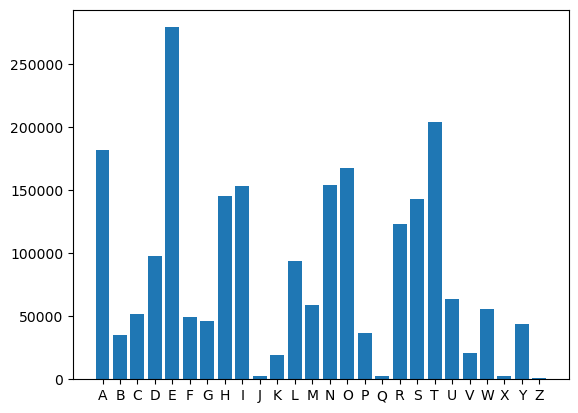

In [9]:
#### GET FREQUENCY OF LETTERS IN ENGLISH LANGUAGE, WRITE TO FILE IN DESCENDING ORDER ####
text = get_large_text()
counts = {chr(x):0 for x in range(65,91)}
text = text.upper()
total_count = 0
for character in text:
    if character in counts:
        counts[character]+=1
        total_count +=1

pct_points_counts = {chr(x):0 for x in range(65,91)}
for key in counts:
    pct_points_counts[key] = counts[key]/total_count
print(pct_points_counts)

letters = list(counts.keys())
appearances = list(counts.values())
plt.bar(range(len(counts)),appearances,tick_label=letters)

plt.show() #shows graph of letter frequencies 

descending_frequencies = open("decsending_frequent_letters.txt","w")
sorted_counts = dict(sorted(counts.items(), key=lambda item: item[1],reverse=True)) #sorts the dictionary by value
frequency = [x for x in sorted_counts] #creates an ordered list of the letters in decreasing frequency
descending_frequencies.write("".join(frequency))
descending_frequencies.close() #writes the most frequent letters in descending order to the file



## Breaking The Caesar Cypher<a name="bcc"></a>

To break the Caesar Cypher, we use frequency analysis to determine the most frequent letter in the encrypted message, and cross reference this with the list of most frequent characters in the english language. Then using that, iterate through each most frequent letter, starting with the most common "E" and use that as a reference for our shift value. Continue until the message looks like plaintext, and the message is decrypted, and the Cypher is broken. 

With a large enough message size, this function should always work on the first attempt, as "E" will be the most frequent letter in almost every large text file. However, this may not always be the case, hence we do iterate through each most common letter until plaintext is received. 

We start as usual, by prompting the user asking for which file they would like to be decrypted, using the find_file function. This is then opened and read to the variable cryptic.

The decrypted_text file is then opened to be written to.

The descending_frequent_letters file is opened, read, and turned into a list and stored in frequency_list. This is the list of frequent letters generated by the large text from novels.


## Breaking Process:<a name="bp"></a>

We start by finding the letter which appears most frequently in the encrypted text. This is done using the frequency_finder function, and that letter is stored to message_most_frequent. 

Then, we set correctness to False. This is to allow the function to continue running until the encrypted message hasbeen decrypted correctly, and plaintext is visible. 

Using a while loop, while correctness is false, we essentially perform Caesar Decryption.

Iterating through the letters in the most frequent letters list, frequency_list, we start Caesar Decryption.

The decrypted_message list is defined, to append our decrypted letters to. 

The shift value is then calculated, by taking the ASCII value of the most frequent letter in the message, and subtracting the ASCII value of the current letter in the frequency list indexed by i, our iterator. 

Then, iterating through each character in cryptic, we first check if the character is alphabetic.

If so, it is then checked whether or not it is uppercase or lowercase, and an appropriate offset value is set. 65 for uppercase, and 97 for lowercase.

The ASCII value of the character is then offset, to set it to be within the range of 0 to 25, for ease of calculation, and stored to the variable character_offset.

The decryption then happens via this formula:

$$(\text{character_offset} - \text{shift_value}) mod26 + \text{offset}$$

This is then appended to the decrypted_message list.

Once all of the characters have been iterated through, the decrypted_message list is joined together as a string, and printed.

The user is then prompted and asked whether the message looks like plaintext or not.

If so, correctness is set to false, and we break out of the for loop. This ends the while loop and the decrypted message is written to the decrypted_text file, and the user is shown a message confirming this.

If the message does not look like plaintext, the loop continues, using the next most frequent letter. 

After plaintext is found, the files are closed. 





In [10]:
##### CAESAR CYPHER BREAK VIA FREQUENCY ANALYSIS ####

def caesar_frequency_break():
    
    #DONT NEED TO RUN FREQUENCY ANALYSIS EVERY TIME, WRITE TO TEXT FILE
    file_name = find_file()
    
    encrypted_text = open(file_name,"r") #opens the encrypted text file to read
    cryptic = encrypted_text.read() #sets cryptic to the string value of all the text in encrypted_text.txt
    
    decrypted_text = open("decrypted_text.txt","w") #opens the decrypted text file to write to  
    
    frequent_letters = open("decsending_frequent_letters.txt","r")    
    frequency_list = list(frequent_letters.read()) #gets the list of the most frequent letters in descending order
    
      
    message_most_frequent = frequency_finder(cryptic)[0] #finds the most frequent letter in the encrypted message
    
    correctness = False 
    while correctness == False: #iterates until plaintext is found
        for i in range(0,len(frequency_list)):
            decrypted_message = []
            
            shift_value = ord(message_most_frequent) - ord(frequency_list[i]) 
            #finds the shift value with corresponding letter of frequency list 
            
            for character in cryptic: #iterates each character in the cryptic text
                if character.isalpha(): #checks if character is in alphabet

                    if character.isupper(): #checks if character is uppercase
                        offset = 65 #sets appropriate offset
                    else:
                        offset = 97

                    character_offset = ord(character)-offset #offsets character to be between 0 and 25

                    decrypted_message.append(chr((character_offset-shift_value)%26+offset))
                    #appends decrypted character to decrypted message list
            print("".join(decrypted_message))
            print("")
            x = input("Does this look like plaintext? Press enter if so, type anything else if not: ")
            if x == "":
                correctness = True
                print("")
                print("Plaintext written to decrypted_text.txt")
                break
            else:
                continue
    decrypted_text.write("".join(decrypted_message)) #writes the plaintext to decrypted_text
    decrypted_text.close()
    encrypted_text.close()
    frequent_letters.close() #closes the files
    return
    
    

# RSA<a name="rsa"></a>

## Turning vigenere key into a Tuple<a name="vkt"></a>
Before we can encrypt using RSA, first we turn the vigenere key into a tuple, because of the way the RSA encryption works, so it runs in a suitable length of time. To do this, we design a function 'key_to_tuple', defined below. 
First we define a variable key with the vigenere key by opening the key file and reading it, to assing it to a variable we can use.
Then, we use the quotient of the key when dividing by 64 to find how many sections we need to divide the key into, as 64 is the maximum length we can encrypt at a time. This is because we use 1024 bit encryption, which means we can use 1024/8 numbers at a time, which is 128. Since each letter has a 2-digit ASCII value, we can only use 64 letters at a time. 
After this, we iterate through the segments, and for every charachter in the segment, ie. inbetween 64*i and 64*(i+1), if the character is the last element of the key, the function breaks, so we dont get a list index out of range error. Then we add the ASCII value to a list.
Next, we turn the list into a long integer, then add it to the rest of the key.
This is returned as a tuple, so it can be inputed into the RSA encryption function.

In [11]:
#### TURN VIGENERE KEY INTO NUMBERS ####
 ## SPLIT KEY FIRST, RETURN TUPLE OF SPLIT KEY
def key_to_tuple():
    key_file = open("_vigenere_key.txt","r") #opens the vigenere key file
    key = key_file.read() #reads the vigenere key to key

    num_of_splits = len(key)//64 #gets the quotient of the key length when dividing by 64 to find out our splits
    split_key = []
    for i in range(0,num_of_splits+1): #iterates through splits
        key_num_list = [] #creates a list for our number key
        for character in range(64*i,64*(i+1)): #iterates through all characters of that split
            if character == len(key): #makes sure not to go out of the range of the string
                break
            key_num_list.append(str(ord(key[character])))#appends the string value of the ASCII value of the character

        key_num_str = "".join(key_num_list) #turns the list into a long string
        key_num = int(key_num_str) #turns the string into an integer
        split_key.append(key_num)#applies the split key to the big list
  
    return tuple(split_key)

key_to_tuple()
# EVERY 2 DIGITS REPRESENTS ONE OF THE LETTERS OF OUR KEY

(84807774828865737766908673698776817373836571697590728190807989738278788670766790688976727680847781728672708087908877799079689070,
 88868365797577897377847684667470806581787586737479847374826874668065677180897384877790766875788266757878868976656968837266668566,
 83878169747282876686717080818677897465728284738089877570858987768179687881777271818475758974786576668573888872836573836884868784,
 707890)

## How RSA Works<a name="rsak"></a>
We will use the RSA protocol to further incrypt the vigenere and N-gram keys. 
The function works by first generating a public key, which is done by the reciever of the encrypted code. This takes the form $(N,e)$ for a large integer $N$ and smaller integer $e$.
To send our tuple through the function, with each part represented by an integer $m$, the system is that we should calculate $m^e \bmod N$ and send that instead.
If this is intecepted, an adversary has the problem of finding
$m$ from the values of $m^e \bmod N$, $N$ and $e$. This is very difficult. However, the key $(N,e)$ has some secret information that can be used to find $m$ much more quickly. 

### The RSA key generator
The first step is set up a key that can be used by other people to send messages to you.
1. Find two large prime numbers $p$ and $q$, using the functions given previously.
2. Let $N=pq$ and find $\phi(N)$. Since $\phi$ is a multiplicative function this is easy, because $\phi(N) = (p-1)(q-1)$.
3. Choose a number $e$ such that $\gcd(e,\phi(N)) = 1$.
4. Find $d$, the modular inverse of $e$ modulo $\phi(N)$. This is an integer where $ed \equiv 1 \bmod \phi(N)$.
5. Publish `(N,e)`,this is the public key.
6. Do not publish `((p,q),phi,d)` as this is your private key. 

### Encryption.<a name="re"></a>

Let the message sent be an integer smaller than $N$, denoted $m$. The sender should send $m^e \bmod N$, which is a number between $0$ and $N$.

### Decryption.<a name="rd"></a>

Once this ciphertext is recieved, the reciever can find $(m^e)^d \bmod N$. Since $d$ is the modular inverse of $e$, $ed = k \phi(N)+1$ for some $k$ and so the Euler-Fermat theorem implies $$(m^e)^d = m^{ed} = m^{k \phi(N)+1} = m((m^{\phi(N)} )^k) \equiv m (1)^k \equiv m \bmod N.$$

Since $m$ was less than $N$, this recovers the original message.

This information was gathered from the lecture notes.

In [12]:
def RSA_key_generator(bitlength=1024): #can take 128 numbers with Bitlength of 1024
    """This will generate RSA keys. This is a version of the private key.
    The output is ((PublicKey), PrivateExp, Factorisation).
    The PublicKey can be published, PrivateExp is needed to decrypt.
    Factorisation is not needed, but must be kept secret."""
    ## Generate two large primes.
    p = cryptography_functions.random_prime(bitlength)
    q = cryptography_functions.random_prime(bitlength)
    N = p*q
    
    ## Next, get phi and use it to get a public and private exponent.
    phi = (p-1)*(q-1)
    ## Choose encryption exponent e randomly between 1 and p and q.
    e = random.randint(1,min(p,q))
    ## It must be coprime to phi though. We use rejection sampling again:    
    while cryptography_functions.gcd(e,phi) > 1:
        e = random.randint(1,min(p,q))
    
    ## Finally, get d using 'pow'
    ## (the extended Euclid's algorithm could do this too).
    d = pow(e,-1,phi)
    
    ## Then return the keys.
    return ((N,e),d%phi,{p:1,q:1})

In [13]:
def RSA_encrypt(N,e):
    encrypted_key_list=[]
    vigi_key_list = list(key_to_tuple())
    for element in vigi_key_list:
        i=pow(element,e,N)
        encrypted_key_list.append(i)
    """Encrypt an integer 'message' using RSA with public key (N,e)."""
    return tuple(encrypted_key_list)

public_key,d,factors = RSA_key_generator()

cipher = RSA_encrypt(public_key[0],public_key[1])


In [14]:
def RSA_decrypt(encrypted_key,N,d):
    complete_key=[]
    decryption_list=list(encrypted_key)
    for element in decryption_list:
        j=pow(element,d,N)
        complete_key.append(str(j))
    """Decrypt an integer message using RSA with public key (N,e) and private key (d, fact)."""
    return "".join(complete_key)

received_int = RSA_decrypt(cipher,public_key[0],d)



# A Hybrid system<a name="ahs"></a>

In order to make our encryption safer, adn harder to crack, we will implement another layer of encryption to the Vigenère cipher, to prevent a potential hacker from using frequency analysis to break our code.


## Disguising the frequency for each letter<a name="df"></a>

In this section we will make our message harder to crack by adding another layer to Vigenère encryption. We design a dictionary of two-grams (e.g. 'po') of distinct letters, and assign each letter some of these two-grams.

In doing this, we can reverse the frequency analysis by giving the most common letters more two-grams, and assigning the least common, fewer.

We generate a Vigenère key as before, using the vigenere_encrypt function. Then, this key and the dictionary of two-grams are RSA encrypted and sent in our public key, which Bob sends Alice.

We then encrypt our chosen message for Bob to send. We encrypt this using the two-grams, and then Vigenère encrypt that. This is sent to Alice as the ecnrypted message, which she can use the public key to decipher.

#### First, we will do Bob's job:

   - Create the public key: The Vigenère Cipher and the dictonary of 2-grams.
   - Encrypt the message with 2-grams, and then using the Vigenère Cipher, and send the message.
     

#### We start by creating a dictionary of 2-grams for each letter.

In [15]:
from random import randint
from random import sample
import string
from itertools import permutations


# create a dictionary of all bigrams:

encode_dict = dict()
    #first define our alphabet and frequencies
ALPH_1 = string.ascii_lowercase
# this is the frequencies from earlier in the project for each letter
fr = {'a': 0.0813382530968154,
    'b': 0.015772428180238454,
    'c': 0.02307211235643865,
    'd': 0.04378202350586753,
    'e': 0.12486207836182597,
    'f': 0.022079076561585642,
    'g': 0.020784064969467386,
    'h': 0.06501369165412156,
    'i': 0.06853376455715428,
    'j': 0.00125078732595071,
    'k': 0.00849105910416825,
    'l': 0.04209882113294529,
    'm': 0.026337113986929273,
    'n': 0.06876203324414029,
    'o': 0.0749226075342068,
    'p': 0.01639692842369527,
    'q': 0.0012807168798216735,
    'r': 0.05524995644579847,
    's': 0.06410999781112219,
    't': 0.09143076668795984,
    'u': 0.028544753617232275,
    'v': 0.00937018391040789,
    'w': 0.024949633474642522,
    'x': 0.0013084128848962963,
    'y': 0.019657016246833945,
    'z': 0.0006017180457341452}
def bigrams(fr):
    global encode_dict
    all_bigrams = ["".join(pair) for pair in permutations(ALPH_1, 2)]
    for key in fr:
        freq = fr[key]
        bi_quantity = round(650*freq) # assign each letter the amount of bigrams proportionate to its probability of occuring
        if bi_quantity == 0:
            bi_quantity = 1 # if the frequency is so low that its quantity rounds down to zero, we replace it with 1
        if bi_quantity > 50:
            bi_quantity -= 1 # to fix our now too large number of bigrams, we shrink the greatest numbers by 1
      
        storage = sample(all_bigrams, bi_quantity) # store the bigrams in a list
        
        all_bigrams = [bigram for bigram in all_bigrams if bigram not in storage] # allows us to look over bigrams that have already been selected
        encode_dict[key]=storage # encode the dictionary with each letter's list
       
    return encode_dict

bigrams(fr); # our dictionary of associated bigrams

## Creating the public key<a name="cpk"></a>

### Now we have our dictionary, we need to construct our public key. We concatenate the Vigenère Cipher and these 2-grams.

We include a space before each string of 2-grams because we want Alice to be able to know where each 2-gram list begins.

We then split it up into strings of length respective to the bit-primes we have, as we want it to be less than p and q (as p*q = N). The string gets split up in the function chopped_up.

In [16]:
import string

def create_string():
    ALPH_1 = string.ascii_lowercase
    key_file = open("_vigenere_key.txt")
    Vig = key_file.read() # retrive the vigenere key from the saved file
    key_string = Vig # create our string
    for ky in ALPH_1:
        two_grams = encode_dict[ky]
        string_two_grams = "".join(two_grams) # join the two grams for each letter, and then 
        
        key_string += ' ' + string_two_grams # add a space and the string for each letter to the string
        
    return key_string # return the concatenated string

print(create_string())

TPMJRXAIMBZVIEWLQIISAGEKZHQZPOYIRNNVFLCZDYLHLPTMQHVHFPWZXMOZODZFXVSAOKMYIMTLTBJFPAQNKVIJOTIJRDJBPACGPYITWMZLDKNRBKNNVYLAEDSHBBUBSWQEJHRWBVGFPQVMYJAHRTIPYWKFUYWLQODNQMHGQTKKYJNALBUIXXHSAISDTVWTFNZ ejhxxcdkgiziepgnpyuwjeeumdkynfnvdgiwxvzjtgfjcgfvmvjvyearfntmcdszgbpqigfoegopzxothrjypcrkrvvosjajpfznjqkv pdohnauqxgoemovfldgm ygzkaxnqxkteoyyhhdcpvrrtgkdaol embhfwhyrxwezwflyaxpblndnxxsbqkuodhzrmklgwnzoglofkpmvpkf xzokvkqyymmiadmpylruprczmhcrwbnkpgkdtbxlrnujyfqvunkpagoulclujuecybzbfaqsexsdcqfdcntfebirfmlbhsnpisupgxtyuejxystudmiqibtojlvanjmffeonbtlvaplrlxryaswfjkvwxdbcpxzo thsijixuiustjtqzsfrdhvmwmgxi qxtqijitzqdymnobqfctvjmysgwv buewwrreuyuhanqwihptbkaydviclgocjrudmedzhuzmvulnqegpavhbcaduhecbmxyocicjgcxmwmrqbjvz bfxtsoqnwadbleycmrwnhjcvzeezbzuvbovmoakieyaotdjpnmfsafeafgzaatvelywtxehahfoqkhkrkzlsjdfxgr lh vnozulviqirg gqrpvqsefzgvoxwyioscnhyvtltcsrdcedsnntmlmstknrdpjmdhqo tzjgkbdstwhotvahhmxopvmzltbatxusab ljgoftqdidixdxdjhibdjbwxlfwdlqposkenufcsesknhqwkkjcxomdqxypsqrdwowvlhkifkwkoinncuitjetglp

In [17]:
# we 'split up' our long string into shorter chunks to encrypt more easily

def chopped_up(string_input, prime_bit_length): # we input what we want to chop up and the bit length we used in our vigenere encryption
    segment_len = (prime_bit_length - 2)//8
    string= [string_input[i:i+segment_len]for i in range(0,len(string_input), segment_len)]
    return string

broken_string = chopped_up(create_string(), 1024)

print(broken_string)

['TPMJRXAIMBZVIEWLQIISAGEKZHQZPOYIRNNVFLCZDYLHLPTMQHVHFPWZXMOZODZFXVSAOKMYIMTLTBJFPAQNKVIJOTIJRDJBPACGPYITWMZLDKNRBKNNVYLAEDSHBBU', 'BSWQEJHRWBVGFPQVMYJAHRTIPYWKFUYWLQODNQMHGQTKKYJNALBUIXXHSAISDTVWTFNZ ejhxxcdkgiziepgnpyuwjeeumdkynfnvdgiwxvzjtgfjcgfvmvjvyearfn', 'tmcdszgbpqigfoegopzxothrjypcrkrvvosjajpfznjqkv pdohnauqxgoemovfldgm ygzkaxnqxkteoyyhhdcpvrrtgkdaol embhfwhyrxwezwflyaxpblndnxxs', 'bqkuodhzrmklgwnzoglofkpmvpkf xzokvkqyymmiadmpylruprczmhcrwbnkpgkdtbxlrnujyfqvunkpagoulclujuecybzbfaqsexsdcqfdcntfebirfmlbhsnpis', 'upgxtyuejxystudmiqibtojlvanjmffeonbtlvaplrlxryaswfjkvwxdbcpxzo thsijixuiustjtqzsfrdhvmwmgxi qxtqijitzqdymnobqfctvjmysgwv buewwr', 'reuyuhanqwihptbkaydviclgocjrudmedzhuzmvulnqegpavhbcaduhecbmxyocicjgcxmwmrqbjvz bfxtsoqnwadbleycmrwnhjcvzeezbzuvbovmoakieyaotdjp', 'nmfsafeafgzaatvelywtxehahfoqkhkrkzlsjdfxgr lh vnozulviqirg gqrpvqsefzgvoxwyioscnhyvtltcsrdcedsnntmlmstknrdpjmdhqo tzjgkbdstwhot', 'vahhmxopvmzltbatxusab ljgoftqdidixdxdjhibdjbwxlfwdlqposkenufcsesknhqwkkjcxomdqxyp

#### Now we have a form that we can encrypt. Firstly, we convert these strings to binary integers, and then RSA encrypt these binary integers. This final ourtput will be our public key.

In [18]:
# now we RSA encrypt each of these parts and send off as the key

def char_to_byte(char): # use the binary code function form letures 
    """
    Returns the 8 bit binary representation (padded with 
    leading zeros when necessary) of ord(char), i.e. of 
    the order of the input character char. 
    """
    byte_string = bin(ord(char))[2:]            # The order of char as a binary string 
    num_zeros = 8 - len(byte_string)            # The number of zeros needed to pad out byte_string
    byte_string = '0' * num_zeros + byte_string # Now pad out byte_string with num_zeros many zeros
                                                # to obtain the 8-bit binary representation
    return byte_string

def binary_key(string_input, prime_bit_length):
    binary_text = []
    for value in string_input:
        binary_value = [char_to_byte(char) for char in value]
        joined = "".join(binary_value)
        binary_text.append("1" +joined)
    return binary_text


# now we are ready for RSA encryption using
input1 = binary_key(broken_string, 1024)

#print(input1)

In [19]:
# check that he length of each

In [20]:
# retreive the RSA key from our function
((N, e), d, k) = RSA_key_generator(bitlength=1024)


# here is our RSA encrypt function:
def RSA_encryption(N, e, input1):
    encrypted_key_list = []
    if type(input1) == list:
        input_list = input1
    else:
        input_list = list(input1)
        
    # turn each binary integer into an integer
    
    for item in input_list:
        int_item = int(item, 2)
        i = pow(int_item, e, N)
        encrypted_key_list.append(i)
    return encrypted_key_list

# RSA encrypt our input:

Bob_public_key = RSA_encryption(N,e,input1)


# print(Bob_public_key)

### We send Alice our public key!

## Message encryption<a name="me"></a>

#### Then we encrypt our message. Firstly, we assign each letter n our chosen message to a 2-gram in its dictionary.

#### For example, to encrypt the letter 'y', we randomly select one of the 13 bigrams associated with 'y'. We do this with everything in our message, and then Vigenère encrypt the result to get our encrypted message.

In [21]:
import random
import string

ALPH_1 = string.ascii_lowercase


## our input it treasure island. users cna change this if they want
file_name = find_file()
message_file = open(file_name, "r")
message = message_file.read()

def bigram_message(message):
    bigrams = []
    for letter in message:
        if letter.isalpha():
            x = encode_dict[letter.lower()][random.randint(0, len(encode_dict[letter.lower()])-1)]
            # we take the lower case version of all the letter so we don't lose anything in our message
            bigrams.append(x)
    message = "".join(bigrams)
    return message

variable = str(bigram_message(message))
# add this output to a text file which we can input into the vigenere cipher
with open("input_text.txt", "w") as input_text:  # 'w' mode opens the file for writing
    input_text.write(variable)

# now we need to vigenere encrypt this

Input the name of the text file you would like to encrypt / decrypt, including the .txt: message_emma.txt


In [22]:
vigenere_encrypt() # when the pop-up appears, input input_text.txt.

# after running this, our encrypted message is stored to encrypted_text.txt

Input the name of the text file you would like to encrypt / decrypt, including the .txt: input_text.txt
Encrypted text written to encrypted_text.txt, and vigenere key written to _vigenere_key.txt


## Now Bob's job is complete!<a name="pkd"></a>

#### He has sent Alice public_key (RSA encrypted binary of the Vigenère key and the bigrams for each letter), and the encrypted message (stored in encrypted_text.txt).

#### Now Alice has to use the public key to decrypt the message.
#### First, we decrypt the public key, then use it to decrypt the bigram message.

In [23]:
##### WE NEED TO RSA DECRYPT Bob_public_key, THIS SHOULD GIVE BINARY


# Now we have N and d to input into the function
#(N, d) = RSA_key_generation(bitlength=1024)

# our RSA decrypt function:
def RSA_decryption(encrypted_input, N, d):
    complete_key_list = []
    if type(encrypted_input) == list:
        decryption_list = encrypted_input
    else:
        decryption_list = list(encrypted_input)
    for item in decryption_list:
        int_item = int(item)
        j = pow(int_item, d, N)
        complete_key_list.append(bin(j)[2:])
    return complete_key_list

### decrypt the public key:
decrypted = RSA_decryption(Bob_public_key, N, d)
# print(decrypted)

assert decrypted == input1



In [24]:
####### ONCE WE HAVE RSA DECRYPTED Bob_public_key, WE CONVERT IT TO TEXT HERE. THIS IS ALICE PUBLIC KEY


def convert_to_text(number):
    # Remove '0b1' from the string 
    bin_string = number[1:]
    bin_int = int(bin_string, 2)
    text = ''                           
    length = len(bin_string)
    for i in range(0, length, 8):  
        # Pick out binary strings, 8 bits at a time
        byte_string = bin_string[i:i+8]   
        # Convert byte_string to a character before appending it to text 
        text = text + chr(int(byte_string,2))  
    return text

plaintext = []
for i in decrypted:
    j = convert_to_text(i)
    plaintext.append(j)
# print(plaintext)

In [25]:
# Then we join everything here into one string which is our public key.

Alice_public_key = "".join(plaintext)
print(Alice_public_key)


## if the decryption did not work (was not plain text):
    # comment the code above,
    # uncomment the following lines

#Alice_public_key = create_string()
#print(Alice_public_key)
#
### (We are pretending this worked so we can do the next stage).

TPMJRXAIMBZVIEWLQIISAGEKZHQZPOYIRNNVFLCZDYLHLPTMQHVHFPWZXMOZODZFXVSAOKMYIMTLTBJFPAQNKVIJOTIJRDJBPACGPYITWMZLDKNRBKNNVYLAEDSHBBUBSWQEJHRWBVGFPQVMYJAHRTIPYWKFUYWLQODNQMHGQTKKYJNALBUIXXHSAISDTVWTFNZ ejhxxcdkgiziepgnpyuwjeeumdkynfnvdgiwxvzjtgfjcgfvmvjvyearfntmcdszgbpqigfoegopzxothrjypcrkrvvosjajpfznjqkv pdohnauqxgoemovfldgm ygzkaxnqxkteoyyhhdcpvrrtgkdaol embhfwhyrxwezwflyaxpblndnxxsbqkuodhzrmklgwnzoglofkpmvpkf xzokvkqyymmiadmpylruprczmhcrwbnkpgkdtbxlrnujyfqvunkpagoulclujuecybzbfaqsexsdcqfdcntfebirfmlbhsnpisupgxtyuejxystudmiqibtojlvanjmffeonbtlvaplrlxryaswfjkvwxdbcpxzo thsijixuiustjtqzsfrdhvmwmgxi qxtqijitzqdymnobqfctvjmysgwv buewwrreuyuhanqwihptbkaydviclgocjrudmedzhuzmvulnqegpavhbcaduhecbmxyocicjgcxmwmrqbjvz bfxtsoqnwadbleycmrwnhjcvzeezbzuvbovmoakieyaotdjpnmfsafeafgzaatvelywtxehahfoqkhkrkzlsjdfxgr lh vnozulviqirg gqrpvqsefzgvoxwyioscnhyvtltcsrdcedsnntmlmstknrdpjmdhqo tzjgkbdstwhotvahhmxopvmzltbatxusab ljgoftqdidixdxdjhibdjbwxlfwdlqposkenufcsesknhqwkkjcxomdqxypsqrdwowvlhkifkwkoinncuitjetglp

#### Alice now knows the public key. The first thing here is the Vigenère key. We split the string up into its parts:

In [26]:
# split back into seperate strings
split_parts = Alice_public_key.split()

#print(split_parts)

alph = '0abcdefghijklmnopqrstuvwxyz' # we will use this to reference items in the dictionary
vigenere_key = split_parts[0] # the vigenere key is the first part

letters = {} # Alice creates a dictionary for the 2grams
for xx in range(1, len(split_parts)):
    letter_grams = []
    i = 1 # ignore vignere key for this part
    while i < len(split_parts[xx]):
        bigram1 = split_parts[xx][i-1], split_parts[xx][i] # takes pairs in each value and assigns them to a letter
        bigram2 = "".join(bigram1)
        letter_grams.append(bigram2)
        i += 2
    letters[alph[xx]] = letter_grams  # But we want our keys to be letters, so we change our dictionary to have letters as keys


#print(letters)

# This tells us all the 2grams associated with each letter.

#### We will have Alice store the bigrams in an inverse dictionary as well, so that it is easier to decode the message.

We do this by taking each pair of (letter, pair), and assigning the dictionary item with the key of the pair, to the letter. Then we will have multiple pairs going to the smae letters, which is what we want when decrypting our message.


We find the corresponding dictionary item to each gram by using it as a key in the dictionary, and do this for every item in the message. Then we use the ''.join() function to turn this back into text, rather than a list of letters.

In [40]:
# Store the letters under the key of the 2grams:

reverse_dict = {}
for letter, grams in letters.items():
    for gram in grams:
        reverse_dict[gram] = letter

# print(reverse_dict) # uncomment to see the reverse dictionary working
# Create a function that decrpyts any bigram encoded message:

def bigram_decrypt(encrypted_2grams_message):
    global reverse_dict # refer to the dictionary globally so we can use the definition we created above.
    decrypted_message = ''.join([reverse_dict[gram] for gram in encrypted_2grams_message])
    return decrypted_message



#### We will leave this for now and come back to it once we have undone the Vigenère Cipher, as the message was Vigenère encrypted after the bigram encryption.

#### We will use our previous vigenere_decrypt() function, on encrypted_text.txt, which is where the message was stored.

In [28]:
vigenere_decrypt() #INPUT encrypted_text.txt HERE!!

Input the name of the text file you would like to encrypt / decrypt, including the .txt: encrypted_text.txt
Decrypted message written to decrypted_text.txt


##### Decrypted text written to decrypted_text.txt. Now we can run this through our bigram decryption!<a name="md"></a>

#### We need to assign a variable to the imported version of this decrypted file first. 'dec' now means decrypted_text.txt, and we can use it here to crack the bigram encryption, using the reverse dictionary.

In [29]:
code_file = open("decrypted_text.txt")
dec = code_file.read()

#print(dec)

#we need to put our message into a list of 2grams
message_grams = []
i = 1
while i < len(dec):
    bigram3 = dec[i-1], dec[i]
    bigram4 = "".join(bigram3)
    message_grams.append(bigram4)
    i += 2

# Message_grams is now the decrypted text as a list of 2grams. we can fianlly use bigram_decrypt...
bigram_decrypt(message_grams)

'emmawoodhousehandsomecleverandrichwithacomfortablehomeandhappydispositionseemedtounitesomeofthebestblessingsofexistenceandhadlivednearlytwentyoneyearsintheworldwithverylittletodistressorvexhershewastheyoungestofthetwodaughtersofamostaffectionateindulgentfatherandhadinconsequenceofhersistersmarriagebeenmistressofhishousefromaveryearlyperiodhermotherhaddiedtoolongagoforhertohavemorethananindistinctremembranceofhercaressesandherplacehadbeensuppliedbyanexcellentwomanasgovernesswhohadfallenlittleshortofamotherinaffectionsixteenyearshadmisstaylorbeeninmrwoodhousesfamilylessasagovernessthanafriendveryfondofbothdaughtersbutparticularlyofemmabetweenthemitwasmoretheintimacyofsistersevenbeforemisstaylorhadceasedtoholdthenominalofficeofgovernessthemildnessofhertemperhadhardlyallowedhertoimposeanyrestraintandtheshadowofauthoritybeingnowlongpassedawaytheyhadbeenlivingtogetherasfriendandfriendverymutuallyattachedandemmadoingjustwhatshelikedhighlyesteemingmisstaylorsjudgmentbutdirectedchieflybyherown

### Alice has the message!

##### Alice has used Bob's public key to decrypt the message he sent, which had been encrypted with bigrams and the Vigenère Cipher.

## Final Touches

We now create a set of functions, to aid user ease, by encapsulating all the working parts of the hybrid encryption algorithms. This will be available to the user by running the menu() function, which will open a list of possible functions that the user can run.

In [30]:
def hybrid_encryption(): #creating a function encapsulating all the working parts of hybrid encryption
    cryptic_key = open("_encrypted_vigenere_key.txt","w")
    public_key_file = open("public_key.txt","w")
    private_key_file = open("private_key.txt","w")
    vigenere_encrypt()
    public_key,d,factors = RSA_key_generator()
    public_key_file.write(str(public_key[0])+ ","+ str(public_key[1]))
    private_key_file.write(str(d))

    cipher = RSA_encrypt(public_key[0],public_key[1])
    cipher_list = []
    for i in range(0,len(cipher)):
        cipher_list.append(str(cipher[i])+",")
    cryptic_key.write("".join(cipher_list))
    
    print("Hybrid Encryption Complete")
    
    cryptic_key.close()
    public_key_file.close()
    private_key_file.close()
        
    return
    

In [31]:
def hybrid_decryption():
    cryptic_key_file = open("_encrypted_vigenere_key.txt","r")
    cryptic_key = cryptic_key_file.read()
    cryptic_key_strings = cryptic_key.strip().split(",")
    cryptic_key_list = [int(key_number.strip()) for key_number in cryptic_key_strings if key_number.strip()]
    
    public_key_file = open("public_key.txt","r")
    public_key = public_key_file.read()
    public_key_strings = public_key.strip().split(",")
    public_key_list = [int(pub_number.strip()) for pub_number in public_key_strings if pub_number.strip()]
    
    private_key_file = open("private_key.txt", "r")
    private_key = int(private_key_file.read())
    
    encrypted_vigenere_key_file = open("_encrypted_vigenere_key.txt","r")
    encrypted_vigenere_key = encrypted_vigenere_key_file.read()
    vigi_key_strings = encrypted_vigenere_key.strip().split(",")
    vigi_key_list = [int(vigi_number.strip()) for vigi_number in vigi_key_strings if vigi_number.strip()]


    
    decrypted_key = RSA_decrypt(vigi_key_list,public_key_list[0],private_key)
    decrypted_key_list = []
    for i in range(1,len(decrypted_key),2):
        decrypted_key_list.append(chr(int(str(decrypted_key[i-1]+str(decrypted_key[i])))))
    decrypted_key = "".join(decrypted_key_list)

        
    
    new_vigi_key = open("_vigenere_key.txt","w")
    new_vigi_key.write(decrypted_key)
    
    new_vigi_key.close()
    cryptic_key_file.close()
    public_key_file.close()
    private_key_file.close()
    
    vigenere_decrypt()
    
    return
        

In [32]:
def hybrid_encryption_bigram(fr):
    ALPH_1 = string.ascii_lowercase
    encode_dict = bigrams(fr)
    broken_string = chopped_up(create_string(),1024)
    input1 = binary_key(broken_string,1024)
    
    public_key_file = open("public_key.txt","w")
    private_key_file = open("private_key.txt","w")
    Bob_cryptic_key = open("Bob_cipher.txt","w")
    
    public_key,d,factors = RSA_key_generator()
    public_key_file.write(str(public_key[0])+ ","+ str(public_key[1]))
    private_key_file.write(str(d))
    
    Bob_cipher_key = RSA_encryption(public_key[0],public_key[1],input1)
    Bob_cipher_list = []
    for i in range(0,len(Bob_cipher_key)):
        Bob_cipher_list.append(str(Bob_cipher_key[i])+",")
    Bob_cryptic_key.write("".join(Bob_cipher_list))
    
    file_name = find_file()
    message_file = open(file_name,"r")
    message = message_file.read()
    
    variable = str(bigram_message(message))
    
    input_text = open("input_text.txt","w")
    input_text.write(variable)
    
    public_key_file.close()
    private_key_file.close()
    message_file.close()
    input_text.close()
    Bob_cryptic_key.close()
    
    print("ENTER input_text.txt BELOW")
    vigenere_encrypt()
    
                    

In [37]:
def hybrid_decryption_bigram():
    
    public_key_file = open("public_key.txt","r")
    public_key = public_key_file.read()
    public_key_strings = public_key.strip().split(",")
    public_key_list = [int(pub_number.strip()) for pub_number in public_key_strings if pub_number.strip()]
    
    private_key_file = open("private_key.txt", "r")
    private_key = int(private_key_file.read())
    
    Bob_cryptic_key_file = open("Bob_cipher.txt","r")
    Bob_cryptic_key = Bob_cryptic_key_file.read()
    Bob_key_strings = Bob_cryptic_key.strip().split(",")
    Bob_key_list = [int(key_number.strip()) for key_number in Bob_key_strings if key_number.strip()]
 
    
  
    decrypted = RSA_decryption(Bob_key_list,public_key_list[0],private_key)
    plaintext = []
    for i in decrypted:
        j = convert_to_text(i)
        plaintext.append(j)
    
    Alice_key = "".join(plaintext)
    
    split_parts = Alice_key.split()
    
    alph = '0abcdefghijklmnopqrstuvwxyz'
    vigenere_key = split_parts[0]
    
    letters = {}
    
    for xx in range(1,len(split_parts)):
        letter_grams = []
        i = 1
        while i < len(split_parts[xx]):
            bigram1 = split_parts[xx][i-1], split_parts[xx][i]
            bigram2 = "".join(bigram1)
            letter_grams.append(bigram2)
            i+=2
        letters[alph[xx]] = letter_grams
        
    reverse_dict = {}
    for letter, grams in letters.items():
        for gram in grams:
            reverse_dict[gram] = letter

    
    vigenere_decrypt()
    
    code_file = open("decrypted_text.txt","r")
    dec = code_file.read()
    
    message_grams = []
    
    i = 1
    
    while i < len(dec):
        bigram3 = dec[i-1], dec[i]
        bigram4 = "".join(bigram3)
        message_grams.append(bigram4)
        i+=2
    decrypted_message = bigram_decrypt(message_grams)
    code_file.close()
    code_file = open("decrypted_text.txt","w")
    code_file.write(decrypted_message)
    
    public_key_file.close()
    private_key_file.close()
    Bob_cryptic_key_file.close()
    code_file.close()
        
        
    
    
    
    
    

In [38]:
def menu(): #creates the menu function, giving the user a choice of which encryption/decryption they can run
    continuation = True #to keep the program running until the user chooses to exit
    while continuation:
        invalidity = True #to check for an invalid choice 
        while invalidity:
            print("Please select one of the following options") #options for functions to run
            print("1) Q1 Caesar Cypher Encryption")
            print("2) Q1 Caesar Cypher Decryption - With a shift value stored in _caesar_shift_value.txt")
            print("3) Q1 Vigenere Cypher Encryption")
            print("4) Q1 Vigenere Cypher Decryption - With a Vigenere key stored in _vigenere_key.txt")
            print("5) Q2 Caesar Cypher Decryption Via Frequency Analysis")
            print("6) Q3 Hybrid Encryption, with Vigenere message encryption and RSA key encryption")
            print("7) Q3 Hybrid Decryption, with encrypted key stored in _encrypted_vigenere_key.txt")
            print("8) Q4 Hybrid Encryption with message bigram encryption, vigenere encryption and RSA encryption")
            print("9) Q4 Hybrid Decryption with keys stored in files")
            print("")
            time.sleep(0.5)
            choice = input("")
            print("")
            options = ["1","2","3","4","5","6","7","8","9"]
            if choice in options:
                invalidity = False
            else:
                print("Invalid Choice")
        if choice == "1": #checks the user input and runs the function they chose
            caesar_encrypt()
        elif choice == "2":
            caesar_decrypt()
        elif choice == "3":
            vigenere_encrypt()
        elif choice == "4":
            vigenere_decrypt()
        elif choice == "5":
            caesar_frequency_break()
        elif choice == "6":
            hybrid_encryption()
        elif choice == "7":
            hybrid_decryption()
        elif choice == "8":
            hybrid_encryption_bigram(fr)
        elif choice == "9":
            hybrid_decryption_bigram()
        print("")
        x = input("Type 'exit' to quit the program, otherwise press enter to continue: ")
        if x == "exit" or x == "Exit":
            continuation = False
        
        

In [41]:
menu()

Please select one of the following options
1) Q1 Caesar Cypher Encryption
2) Q1 Caesar Cypher Decryption - With a shift value stored in _caesar_shift_value.txt
3) Q1 Vigenere Cypher Encryption
4) Q1 Vigenere Cypher Decryption - With a Vigenere key stored in _vigenere_key.txt
5) Q2 Caesar Cypher Decryption Via Frequency Analysis
6) Q3 Hybrid Encryption, with Vigenere message encryption and RSA key encryption
7) Q3 Hybrid Decryption, with encrypted key stored in _encrypted_vigenere_key.txt
8) Q4 Hybrid Encryption with message bigram encryption, vigenere encryption and RSA encryption
9) Q4 Hybrid Decryption with keys stored in files

9

Input the name of the text file you would like to encrypt / decrypt, including the .txt: encrypted_text.txt
Decrypted message written to decrypted_text.txt


KeyError: 'yk'